In [162]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [163]:
WTI_data = Path("./Resources/WTI.csv")
WTI_df = pd.read_csv(WTI_data, index_col="Day", parse_dates=True, infer_datetime_format=True)
WTI_df.sort_index(inplace=True)
WTI_df.head()

,Cushing OK WTI Spot Price FOB Dollars per Barrel
Day,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [164]:
WTI_df.columns=["WTI Spot Price"]
WTI_df.head()

,WTI Spot Price
Day,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [165]:
WTI_returns = WTI_df.pct_change().dropna()
WTI_returns = WTI_returns.rename(columns={'WTI Spot Price': 'WTI Returns'})
WTI_returns.sort_index(inplace=True)
WTI_returns.head()

,WTI Returns
Day,
1986-01-03,0.017214
1986-01-06,0.020385
1986-01-07,-0.025631
1986-01-08,0.000774
1986-01-09,0.006185


In [169]:
MES_data = Path("./Resources/MES.csv")
MES_df = pd.read_csv(MES_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
MES_df.sort_index(inplace=True)
MES_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-06,2947.50,2947.50,2883.75,2932.50,2932.50,159243
2019-05-07,2912.00,2930.75,2862.50,2890.75,2890.75,246925
2019-05-08,2890.25,2899.25,2868.75,2887.25,2887.25,254506
2019-05-09,2884.25,2885.50,2836.25,2872.75,2872.75,340659
2019-05-10,2870.25,2893.00,2826.00,2887.00,2887.00,396057


In [170]:
MES_df["Close"] = MES_df["Close"].astype("float")
MES_df["Volume"] = MES_df["Volume"].astype("int")
MES_df.drop(columns=["Open", "High", "Low", "Adj Close"], inplace=True)
MES_df.head()

,Close,Volume
Date,,
2019-05-06,2932.50,159243
2019-05-07,2890.75,246925
2019-05-08,2887.25,254506
2019-05-09,2872.75,340659
2019-05-10,2887.00,396057


In [171]:
MES_df["Notional Volume"] =  MES_df["Close"] * MES_df["Volume"] * 5
MES_df["Notional Volume"] = MES_df["Notional Volume"].astype("float")
MES_df = MES_df.rename(columns={'Close': 'MES Close',
                               'Volume': 'MES Volume',
                               'Notional Volume': 'MES Notional Volume'})
MES_df

#MES_returns = MES_df["Close"].pct_change().dropna()
#MES_returns
#MES_returns = MES_returns.rename(columns={'Close': 'MES Returns'})
#MES_returns.head()

,MES Close,MES Volume,MES Notional Volume
Date,,,
2019-05-06,2932.50,159243,2.334900e+09
2019-05-07,2890.75,246925,3.568992e+09
2019-05-08,2887.25,254506,3.674112e+09
2019-05-09,2872.75,340659,4.893141e+09
2019-05-10,2887.00,396057,5.717083e+09
...,...,...,...
2023-04-24,4159.50,816228,1.697550e+10
2023-04-25,4093.25,982508,2.010825e+10
2023-04-26,4076.00,1142361,2.328132e+10


In [172]:
MES_returns = MES_df["MES Close"].pct_change().dropna()
MES_returns.head()

Date
2019-05-07   -0.014237
2019-05-08   -0.001211
2019-05-09   -0.005022
2019-05-10    0.004960
2019-05-13   -0.027710
Name: MES Close, dtype: float64

In [173]:
ES_data = Path("./Resources/ES.csv")
ES_df = pd.read_csv(ES_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
ES_df.sort_index(inplace=True)
ES_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2018-05-01,2652.25,1294588,2646.25,2658.00,2623.25
2018-05-02,2627.50,1368993,2655.50,2658.50,2624.25
2018-05-03,2631.80,2085915,2626.75,2636.25,2591.25
2018-05-04,2663.00,1627248,2631.75,2669.50,2612.25
2018-05-07,2670.00,1106056,2662.75,2681.50,2661.25


In [174]:
ES_df.drop(columns=["Open", "High", "Low"], inplace=True)
ES_df.head()

,Close/Last,Volume
Date,,
2018-05-01,2652.25,1294588
2018-05-02,2627.50,1368993
2018-05-03,2631.80,2085915
2018-05-04,2663.00,1627248
2018-05-07,2670.00,1106056


In [175]:
ES_df["Notional Volume"] =  ES_df["Close/Last"] * ES_df["Volume"] * 50
ES_df["Notional Volume"] = ES_df["Notional Volume"].astype("float")
ES_df = ES_df.rename(columns={'Close/Last': 'ES Close',
                               'Volume': 'ES Volume',
                               'Notional Volume': 'ES Notional Volume'})
ES_df

,ES Close,ES Volume,ES Notional Volume
Date,,,
2018-05-01,2652.25,1294588,1.716786e+11
2018-05-02,2627.50,1368993,1.798515e+11
2018-05-03,2631.80,2085915,2.744856e+11
2018-05-04,2663.00,1627248,2.166681e+11
2018-05-07,2670.00,1106056,1.476585e+11
...,...,...,...
2023-04-25,4093.25,1693915,3.466809e+11
2023-04-26,4076.00,1754708,3.576095e+11
2023-04-27,4153.75,1619468,3.363433e+11


In [176]:
ES_returns = ES_df["ES Close"].pct_change().dropna()
ES_returns.head()

Date
2018-05-02   -0.009332
2018-05-03    0.001637
2018-05-04    0.011855
2018-05-07    0.002629
2018-05-08    0.000112
Name: ES Close, dtype: float64

In [177]:
load_dotenv()

True

In [178]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [179]:
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [180]:
start = pd.Timestamp('2019-05-01', tz='America/New_York').isoformat()
end = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [181]:
tickers=["SPY"]

In [182]:
timeframe="1Day"

In [183]:
portfolio_df_year = alpaca.get_bars(tickers, timeframe, start=start, end=end).df
portfolio_df_year.tail(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-04-18 04:00:00+00:00,415.58,415.72,412.7802,414.21,63567329,493414,414.073765,SPY
2023-04-19 04:00:00+00:00,412.22,415.08,412.1600,414.14,55252464,421201,413.662834,SPY
2023-04-20 04:00:00+00:00,411.21,413.70,410.2700,411.88,75839327,546265,412.016996,SPY
2023-04-21 04:00:00+00:00,412.19,412.68,410.1700,412.20,72023892,468905,411.767653,SPY
2023-04-24 04:00:00+00:00,411.99,413.07,410.6000,412.63,64341184,463571,412.080965,SPY
2023-04-25 04:00:00+00:00,410.58,411.16,406.0200,406.08,97784465,612111,408.273271,SPY
2023-04-26 04:00:00+00:00,406.72,407.84,403.7800,404.36,80954650,572128,405.591919,SPY
2023-04-27 04:00:00+00:00,407.00,412.69,406.7400,412.41,92968169,614868,410.101891,SPY
2023-04-28 04:00:00+00:00,411.49,415.93,411.4300,415.93,84857179,592226,414.377425,SPY


In [184]:
SPY_closing = pd.DataFrame()
SPY_closing['close'] = portfolio_df_year['close']
SPY_closing.index = portfolio_df_year.index.date
SPY_closing.head()

,close
2019-05-01,291.82
2019-05-02,291.13
2019-05-03,293.98
2019-05-06,292.83
2019-05-07,288.05


In [185]:
SPY_daily_return = SPY_closing.pct_change().dropna()
SPY_daily_return = SPY_daily_return.rename(columns={'close': 'SPY_returns'})
SPY_daily_return.index = pd.to_datetime(SPY_daily_return.index)
SPY_daily_return.head()

,SPY_returns
2019-05-02,-0.002364
2019-05-03,0.009789
2019-05-06,-0.003912
2019-05-07,-0.016323
2019-05-08,-0.001111


In [186]:
SPY_df = portfolio_df_year
SPY_df["close"] = SPY_df["close"].astype("float")
SPY_df["volume"] = SPY_df["volume"].astype("int")
SPY_df.drop(columns=["open", "high", "low", "trade_count", "vwap", "symbol"], inplace=True)
SPY_df.head()

,close,volume
timestamp,,
2019-05-01 04:00:00+00:00,291.82,71921870
2019-05-02 04:00:00+00:00,291.13,65058183
2019-05-03 04:00:00+00:00,293.98,56579556
2019-05-06 04:00:00+00:00,292.83,107250892
2019-05-07 04:00:00+00:00,288.05,145292657


In [187]:
SPY_df["Notional Volume"] =  SPY_df["close"] * SPY_df["volume"] * 5
SPY_df["Notional Volume"] = SPY_df["Notional Volume"].astype("float")
SPY_df = SPY_df.rename(columns={'close': 'SPY Close',
                               'volume': 'SPY Volume',
                               'Notional Volume': 'SPY Notional Volume'})
SPY_df.index = SPY_df.index.date
SPY_df

,SPY Close,SPY Volume,SPY Notional Volume
2019-05-01,291.82,71921870,1.049412e+11
2019-05-02,291.13,65058183,9.470194e+10
2019-05-03,293.98,56579556,8.316629e+10
2019-05-06,292.83,107250892,1.570314e+11
2019-05-07,288.05,145292657,2.092577e+11
...,...,...,...
2023-04-25,406.08,97784465,1.985416e+11
2023-04-26,404.36,80954650,1.636741e+11
2023-04-27,412.41,92968169,1.917050e+11
2023-04-28,415.93,84857179,1.764732e+11


In [188]:
joined_returns = pd.concat([ES_returns, MES_returns, WTI_returns, SPY_daily_return], axis="columns", join="inner")
joined_returns.head()

,ES Close,MES Close,WTI Returns,SPY_returns
2019-05-07,-0.014186,-0.014237,-0.014286,-0.016323
2019-05-08,-0.001245,-0.001211,0.011724,-0.001111
2019-05-09,-0.005022,-0.005022,-0.008852,-0.003684
2019-05-10,0.004978,0.004960,0.001137,0.004744
2019-05-13,-0.027676,-0.027710,-0.011030,-0.024440


In [189]:
joined_returns.head()

,ES Close,MES Close,WTI Returns,SPY_returns
2019-05-07,-0.014186,-0.014237,-0.014286,-0.016323
2019-05-08,-0.001245,-0.001211,0.011724,-0.001111
2019-05-09,-0.005022,-0.005022,-0.008852,-0.003684
2019-05-10,0.004978,0.004960,0.001137,0.004744
2019-05-13,-0.027676,-0.027710,-0.011030,-0.024440


In [190]:
traded_notional_dataset = pd.concat([ES_df, MES_df, SPY_df], axis="columns", join="inner")
traded_notional_dataset.drop(columns=["ES Close", "ES Volume","MES Close", "MES Volume", "SPY Close", "SPY Volume"], inplace=True)
traded_notional_dataset

C:\Users\mdcod\anaconda3\envs\alpacaenv5\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,ES Notional Volume,MES Notional Volume,SPY Notional Volume
2019-05-06,2.882410e+11,2.334900e+09,1.570314e+11
2019-05-07,3.954052e+11,3.568992e+09,2.092577e+11
2019-05-08,2.894487e+11,3.674112e+09,1.319455e+11
2019-05-09,3.814653e+11,4.893141e+09,1.483105e+11
2019-05-10,4.021474e+11,5.717083e+09,1.621657e+11
...,...,...,...
2023-04-24,2.674760e+11,1.697550e+10,1.327455e+11
2023-04-25,3.466809e+11,2.010825e+10,1.985416e+11
2023-04-26,3.576095e+11,2.328132e+10,1.636741e+11
2023-04-27,3.363433e+11,1.800773e+10,1.917050e+11


<AxesSubplot:title={'center':'Total Notional Volumes'}>

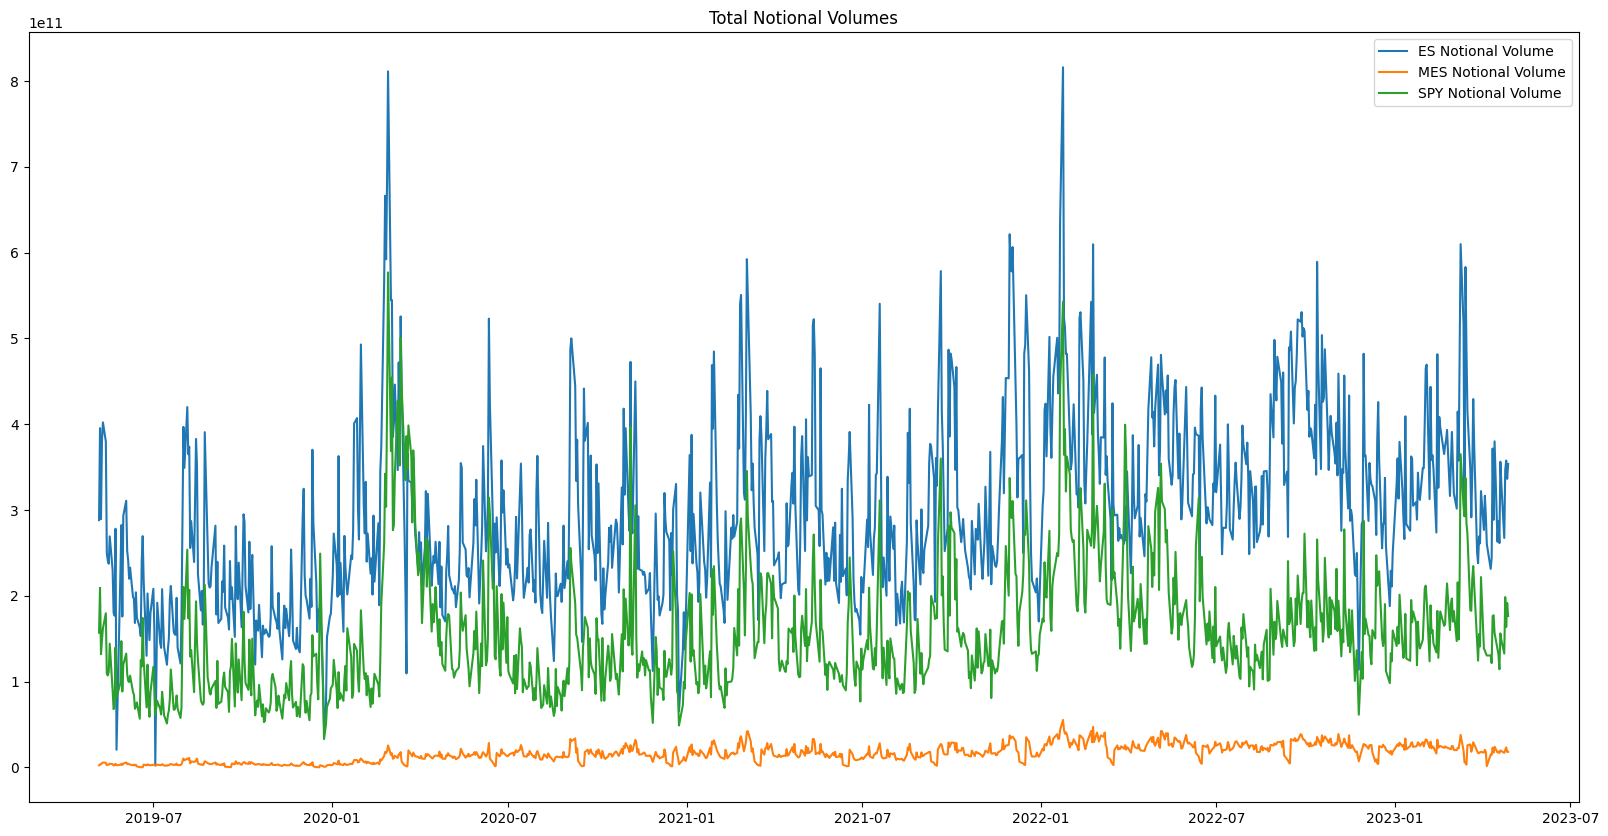

In [201]:
traded_notional_dataset.plot(figsize = (20, 10), title = "Total Notional Volumes")

In [196]:
pct_chg_notional_traded = traded_notional_dataset.pct_change().dropna()
pct_chg_notional_traded

,ES Notional Volume,MES Notional Volume,SPY Notional Volume
2019-05-07,0.371787,0.528541,0.332585
2019-05-08,-0.267969,0.029454,-0.369459
2019-05-09,0.317903,0.331789,0.124029
2019-05-10,0.054218,0.168387,0.093420
2019-05-13,-0.055453,-0.057842,0.107548
...,...,...,...
2023-04-24,-0.190124,-0.108839,-0.105737
2023-04-25,0.296119,0.184546,0.495656
2023-04-26,0.031524,0.157799,-0.175618
2023-04-27,-0.059468,-0.226516,0.171260


In [197]:
pct_chg_notional_traded_cumul = (1+pct_chg_notional_traded).cumprod()
pct_chg_notional_traded_cumul

,ES Notional Volume,MES Notional Volume,SPY Notional Volume
2019-05-07,1.371787,1.528541,1.332585
2019-05-08,1.004190,1.573563,0.840249
2019-05-09,1.323425,2.095653,0.944464
2019-05-10,1.395178,2.448534,1.032696
2019-05-13,1.317811,2.306905,1.143760
...,...,...,...
2023-04-24,0.927960,7.270332,0.845344
2023-04-25,1.202747,8.612039,1.264343
2023-04-26,1.240661,9.971010,1.042302
2023-04-27,1.166882,7.712419,1.220807


<AxesSubplot:title={'center':'Cumulative Percentage Change in Notional Volume'}>

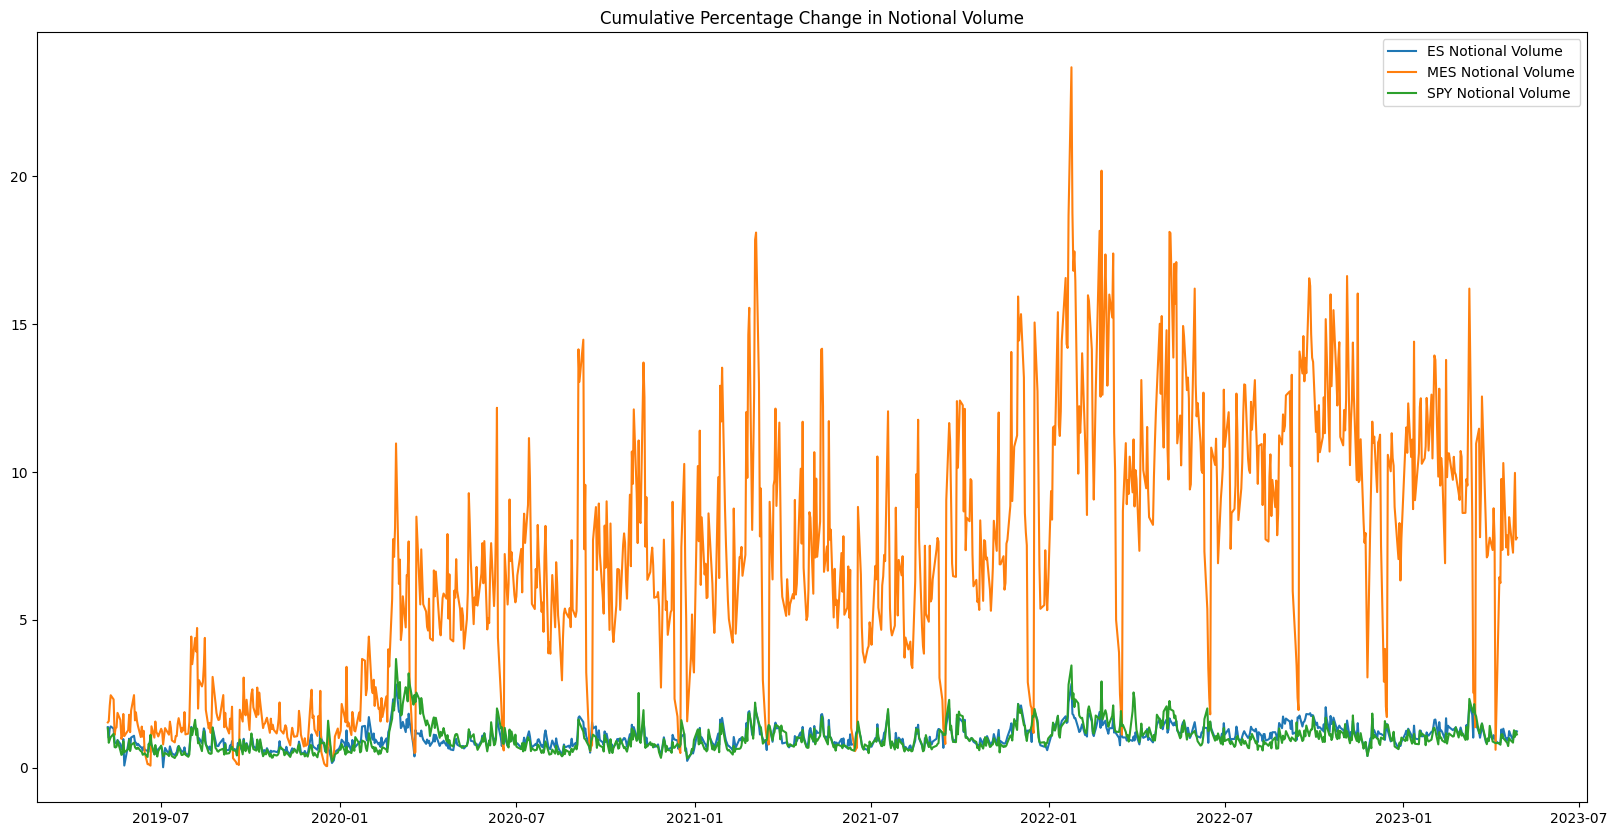

In [200]:
pct_chg_notional_traded_cumul.plot(figsize = (20,10), title = "Cumulative Percentage Change in Notional Volume")